<a href="https://colab.research.google.com/github/pujaroy280/DATA620WebAnalytics/blob/main/DATA_620_Week_2_Part_1_Graph_Visusalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Visualization


This week's assignment is to:

1. Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.

2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.

3. Use a visualization tool of your choice to display information. Use NetworkX directly or pyviz or another tool. You can try Gephi too if you like or Neo4j but you should get used to use the Python toolset

4. Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up. You wll be showing your assignment in the meet-up but it always useful to have a recording.


Group (The DataDriven Team): Susanna Wong, Puja Roy, Mikhail Broomes & Marjete Vucinaj

# Video
https://drive.google.com/file/d/1CCfaTo5tI-T3DXCgzt5YTt_zhc2ZmLj9/view

# Hyena

The [dataset](https://networkrepository.com/mammalia-hyena-networka.php) used for this assignment represents the social network of spotted hyenas population in the Masai Mara National Reserve, Kenya. This data was collected over four months through data scan every 15 minutes during low prey abundance.

In [ ]:
import networkx as nx
import pandas as pd

hyena_edge_df = pd.read_csv('https://raw.githubusercontent.com/suswong/DATA-620/main/mammalia-hyena-networka.edges', delim_whitespace = True,header=None, names = ['Nodes1','Nodes2','Weight'])
hyena_edge_df

,Nodes1,Nodes2,Weight
0,1,2,0.021053
1,1,3,0.043860
2,1,4,0.033708
3,1,5,0.070175
4,1,6,0.017341
...,...,...,...
516,32,34,0.064516
517,32,35,0.009091
518,33,34,0.132743
519,33,35,0.080808


#Analysis

There are 35 nodes representing 34 individual hyena in the population and 521 edges representing the interactions between the hyenas.

In [ ]:
hyena_g = nx.from_pandas_edgelist(hyena_edge_df,"Nodes1", "Nodes2")
hyena_g

In [ ]:
nx.number_of_nodes(hyena_g) #Just checking, we can remove this code

35

In [ ]:
nx.number_of_edges(hyena_g) #Just checking, we can remove this code

521

The density of the network is about 0.88. Since it is close to 1, it indicates the network is higly interconnected.

In [ ]:
nx.density(hyena_g)

0.8756302521008403

# Visusalization

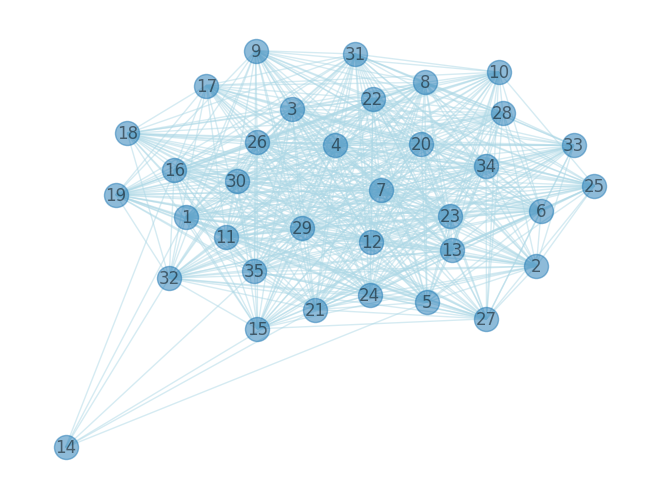

In [ ]:
nx.draw(hyena_g, with_labels = True, edge_color = 'lightblue', alpha = 0.5)

In [ ]:
nx.diameter(hyena_g) # Interpret? "The shortest path between two most distant nodes in a network" It's only 2 so the network is quite compact

2

In [ ]:
nx.degree(hyena_g) #Shows the number of connections it has with other nodes. NOde 14 has the least.

DegreeView({1: 32, 2: 30, 3: 32, 4: 32, 5: 29, 6: 32, 7: 33, 8: 32, 9: 26, 10: 27, 11: 33, 12: 33, 13: 32, 14: 7, 15: 26, 16: 33, 19: 29, 20: 33, 21: 30, 22: 32, 23: 34, 24: 33, 25: 27, 26: 33, 27: 28, 28: 29, 29: 34, 30: 27, 31: 31, 32: 31, 33: 27, 34: 33, 35: 31, 17: 25, 18: 26})

In [ ]:
def average_node_connectivity(graph):
  node_conn = nx.average_node_connectivity(graph)
  return node_conn
avg_node_connectivity = average_node_connectivity(hyena_g)
print(f"Average node connectivity: {avg_node_connectivity}")
#second metric suggests the graph is highly interconnected

Average node connectivity: 27.500840336134456




---



# Tortoise

The [dataset](https://networkrepository.com/reptilia-tortoise-network-cs-2014.php) used for this assignment represents the social network of dessert tortoise population in Nevada, USA. This data was collected over eight months.

The graph has been visualized with nodes and edges displayed. Edges are colored light blue, and nodes are labeled for clarity.

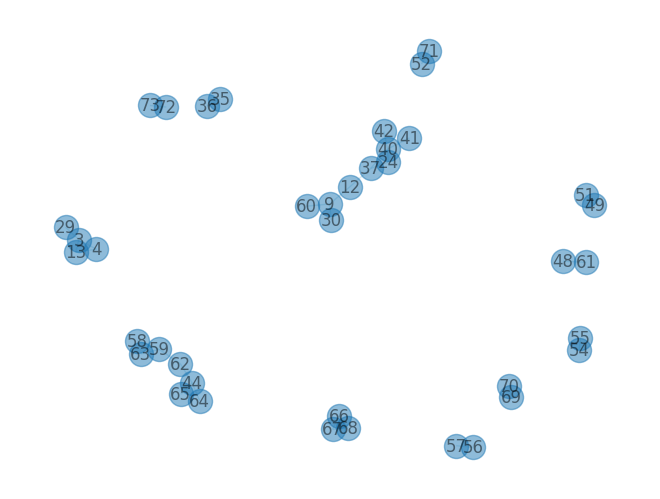

In [ ]:
tortoise_edge_df = pd.read_csv('https://raw.githubusercontent.com/suswong/DATA-620/main/reptilia-tortoise-network-cs-2014.edges', delim_whitespace = True,header=None, names = ['Nodes1','Nodes2'])
tortoise_edge_df

tortoise_g = nx.from_pandas_edgelist(tortoise_edge_df,"Nodes1", "Nodes2")
tortoise_g

nx.draw(tortoise_g, with_labels = True, edge_color = 'lightblue', alpha = 0.5)


#Analysis

There are 39 nodes representing 39 individual tortoises in the population and 30 edges representing the interactions between the tortoises.

Each node in the graph represents an individual tortoise in the population.

In [ ]:
nx.number_of_nodes(tortoise_g) #Just checking, we can remove this code

39

Each edge represents an interaction between two tortoises.

In [ ]:
nx.number_of_edges(tortoise_g)

30



*   Density is a measure of how many edges are in the graph compared to the maximum possible number of edges between nodes.

*   With density of approximately 0.0405, the tortoise social netwoek is relatively sparse. This means about 4% of all possible edges between nodes are present.



In [ ]:
nx.density(tortoise_g)

0.04048582995951417



*   This metric indicates the avaerage number of node-independent paths connecting pair of nodes in the grpah
*   A low average node connectivity suggests that the netwoek is not highly interconnected. This can imply that the interaction between the tortoises are limited and that there might be relatively few alternative paths for interaction between individuals.



In [ ]:
avg_node_connectivity = average_node_connectivity(tortoise_g)
print(f"Average node connectivity: {avg_node_connectivity}")

Average node connectivity: 0.11201079622132254
